# Part 1: Introduction to Vector Data Processing in Python

You probably know the ogr package for vector data processing in Python. But that's not all. This notebook will give you a short overview of other Python packages used for vector data processing in Python. We will look at: 

* geojson
* fiona
* shapely

During the course we will mainly work with GeoJSON files instead of shapefiles. Therefore, the first section of this notebook gives a brief explanation of this format. 

## 1. The GeoJSON Format

[GeoJSON](https://geojson.org/) is a format for encoding a variety of geographic data structures. 

It is __based on JavaScript Object Notation (JSON)__ which is an open standard file format, and data interchange format, that uses __human-readable text__ to store and transmit data objects consisting of __attribute–value pairs and array data types__ (or any other serializable value). [Wikipedia](https://en.wikipedia.org/wiki/JSON)


A __feature__ object contains a __geometry__ and additional __properties__. 

``` python
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
```

GeoJSON supports the following geometry types: 
* Point 
* LineString 
* Polygon
* MultiPoint 
* MultiLineString
* MultiPolygon

A __Feature Collection__ object contains sets of features.

``` python 
{
    "type":"FeatureCollection",
        "features":[{"type":"Feature",
                     "properties":{...},
                     "geometry": {...},
                    {"type":"Feature",
                     "properties":{...},
                     "geometry":{...}
                    }]
}
```

#### __Question:__ 

Which data types in Python are suitable to represent geojson data in Python? 

Why we use GeoJSON in this course: 
* Very good integration in Python as dictionaries &rarr; easily read using `json` or `geojson` packages
* GeoJSON supported by many packages: `fiona`, `shapely`, `geopandas` (all other GDAL file formats are supported as well)
* Readible by humans and machines
* Web APIs use json/geojson as reponse format

## 2. `json` / `geojson`: Reading json / geojson files

The `json` package makes reading and writing json files easy in Python: 

### Encoding and Decoding GeoJSON 

`json.load()`/`json.loads()` for decoding: file connection / string &rarr; dict

`json.dump()`/`json.dumps()` for encoding: dict &rarr; file connection / string

### Reading the following file using `json.open()`

In [1]:
file_path = "./data/some_features.geojson"

In [2]:
import json
src = open(file_path, "r")
data_geojson = json.load(src)
src.close()

In [3]:
type(data_geojson)

dict

In [4]:
data_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'color': 'green', 'id': 1},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.670530319213867, 49.41337442939828],
      [8.685293197631836, 49.41337442939828],
      [8.685293197631836, 49.421861555723595],
      [8.670530319213867, 49.421861555723595],
      [8.670530319213867, 49.41337442939828]]]}},
  {'type': 'Feature',
   'properties': {'color': 'blue', 'id': 2},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.680486679077148, 49.418455714236885],
      [8.69619369506836, 49.418455714236885],
      [8.69619369506836, 49.42833758576036],
      [8.680486679077148, 49.42833758576036],
      [8.680486679077148, 49.418455714236885]],
     [[8.688468933105469, 49.42398310798032],
      [8.693962097167969, 49.42398310798032],
      [8.693962097167969, 49.426607006252176],
      [8.688468933105469, 49.426607006252176],
      [8.688468933105469, 49.42398310798032]]]}}]}

### Tipp: Use context managers to read and write data in Python
When you open a file connection to read it, it is very important that you explicitly close it afterwards to avoid conflicts in file access with other programs. This is done using the `close()` method. However, we tend to forget it from time to time which can lead to problems in file access.

To avoid this __Context managers__ are very helpful. You create them using the ```with ... as ...:``` statement. Everything inside the block is executed while the file is open. Afterwards the file is closed automatically. 

In [5]:
with open(file_path, "r") as src:
    data_geojson = json.load(src)

In [6]:
data_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'color': 'green', 'id': 1},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.670530319213867, 49.41337442939828],
      [8.685293197631836, 49.41337442939828],
      [8.685293197631836, 49.421861555723595],
      [8.670530319213867, 49.421861555723595],
      [8.670530319213867, 49.41337442939828]]]}},
  {'type': 'Feature',
   'properties': {'color': 'blue', 'id': 2},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[8.680486679077148, 49.418455714236885],
      [8.69619369506836, 49.418455714236885],
      [8.69619369506836, 49.42833758576036],
      [8.680486679077148, 49.42833758576036],
      [8.680486679077148, 49.418455714236885]],
     [[8.688468933105469, 49.42398310798032],
      [8.693962097167969, 49.42398310798032],
      [8.693962097167969, 49.426607006252176],
      [8.688468933105469, 49.426607006252176],
      [8.688468933105469, 49.42398310798032]]]}}]}

### Accessing items from the dictionary

__E:__ Extract the coordinates of the first feature. 

### The `geojson` package
The `geojson` package is based on the `json` package but offers additional classes to represent different geometry types e.g. `geojson.feature.Polygon`.

&rarr; Check out the [geojson package documentation](https://pypi.org/project/geojson) if you are interested

In [7]:
import geojson
with open(file_path, "r") as src:
    data_geojson = geojson.loads(src.read())

In [8]:
type(data_geojson)

geojson.feature.FeatureCollection

In [9]:
polygon = data_geojson["features"][0]["geometry"]

In [10]:
type(polygon)

geojson.geometry.Polygon

### Creating a new feature and converting it to geojson

In [11]:
new_feature = geojson.Feature(geometry=polygon, properties={"id": 321})
new_feature_geojson = geojson.dumps(new_feature)

In [12]:
type(new_feature_geojson)

str

In [13]:
new_feature_geojson

'{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[8.670530319213867, 49.41337442939828], [8.685293197631836, 49.41337442939828], [8.685293197631836, 49.421861555723595], [8.670530319213867, 49.421861555723595], [8.670530319213867, 49.41337442939828]]]}, "properties": {"id": 321}}'

## 3. `fiona`: Reading and writing Geographic Data

"[Fiona] focuses on reading and writing data in standard Python IO style and relies upon familiar Python types and protocols such as files, dictionaries, mappings, and iterators instead of classes specific to GDAL's OpenGIS Reference Implementation (OGR)." 

&rarr; Check out the [Fiona Documentation](https://github.com/Toblerity/Fiona)

#### BTW: Why the name?
ogr &rarr; "Oger" &rarr; Shrek the Movie &rarr; Fiona

### Reading data

Opening a file using `fiona.open()` and extracting metadata from the file: 

In [14]:
import fiona
source = fiona.open(file_path)
features = list(source)
crs = source.crs
metadata = source.meta
source.close()

__E 3.1:__ Wait this looks like we could use a Context Manager again! Reformat the above code so that it uses a context manager.

### Writing data
Writing data to file using fiona works in a similar way. You just need to pass `mode='w'` to the `open()` method.

The default is `'r'` which stands for reading, while `'w'` stands for writing.

When you create a new file you need to tell `fiona` the metadata of that file, e.g. driver, schema, etc. In this example we will just use the meta information of the input file contained in the `metadata` variable. 

Writing the first feature of the original file to a new file looks like:

In [16]:
outfile = "./data/test_out.geojson"
with fiona.open(outfile, "w", **metadata) as dst:
    dst.write(features[0])

### Exercises:

__E 3.2:__  Extract all __features__, the __crs__ (coordinate reference system) and the __schema__ from the following file using `fiona`.

__Hint:__ Place the mouse cursor next to the dot after the variable name and press `TAB` to show all available attributes and methods. 

<img src="./img/show_methods.png" alt="show_methods" style="width: 400px;"/>

In [17]:
file_path_2 = "./data/some_features.geojson"

__Questions:__
1. What how many features are contained in the geojson file? 
2. What is the difference between the geometries of the features?

__Answer:__

__E 3.3:__ Save the features to separate new variables 'feature1' and 'feature2'.

__E 3.4:__ Print the coordinates of feature2.

__E 3.5:__ Fill the hole of the geometry of `feature2` by manipulating the geojson dictionary. Afterwards, execute the cell above again to see how the coordinates changed.

## 4. `shapely`: Geometric Operations and Manipulations

Removing a hole from a polygon is easy when it is represented as a dictionary, but what if we want to perform more complex geometric operations such as intersections between two geometries? In this case, we need more complex data structures than a dictionary.

`shapely` is the perfect tool for this! It converts dictionary-like objects to geometry objects and allows us to perform geospatial operations. 

&rarr; Check out the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html)

### Creating geometry objects 
Shapely supports the same geometry types as GeoJSON (see above).

In [18]:
from shapely.geometry import Point

In [19]:
point = Point(8.69, 49.41)
type(point)

shapely.geometry.point.Point

In [20]:
point.x

8.69

### Convert geojson to geometry objects
Using the method `shapely.geometry.shape` you can convert GeoJSON dictionaries to geometry objects.

In [21]:
from shapely.geometry import shape

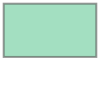

In [24]:
geometry1 = feature1["geometry"]
polygon1 = shape(geometry1)
polygon1

### Geometry operations 

The geometry obejcts contain __attributes and methods which allow geometric operations.__ 

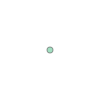

In [25]:
polygon1.centroid

In [26]:
point.within(polygon1)

False

### Converting geometry to geojson
Converting geometry obejcts to geojson is done using `shapely.geometry.mapping()`.

In [27]:
from shapely.geometry import mapping
mapping(polygon1)

{'type': 'Polygon',
 'coordinates': (((8.670530319213867, 49.41337442939828),
   (8.685293197631836, 49.41337442939828),
   (8.685293197631836, 49.421861555723595),
   (8.670530319213867, 49.421861555723595),
   (8.670530319213867, 49.41337442939828)),)}

### Exercises:

__E 4.1:__ Create a rectangle geometry with a hole using shapely.

__E 4.2:__ Create a point which is located inside the rectangle.

__E 4.3:__ Use the a suitbale shapely method to check whether the point is inside the rectangle.

__E 4.4:__ Convert the geometry of the second feature to a `shapely.geometry.Polygon` called `polygon2`.

__E 4.6:__ Calculate the intersection between `poylgon1` and `poylgon2`.

## 5.  Summary
* geojson and json in general work) very well with Python.
* shapely and fiona provide classes to represent geospatial data and perform geospatial analyses in Python.
* Of course there are more relevant packages, e.g. [pyproj](https://pyproj4.github.io/pyproj/stable/) to transform geometries to different coordinate reference systems

### But wait ...
We already have the ogr package to do the same things? So why do we need shapely and fiona? 

&rarr; Continue with [Part 2: Why all these packages](./01-Why_all_these_packages.ipynb) to find out. 

## References:

[GeoJSON](https://geojson.org/)

[Geojson python package Documentation](https://pypi.org/project/geojson)

[Fiona Documentation](https://github.com/Toblerity/Fiona)

[Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html)

[pyproj Documentation](https://pyproj4.github.io/pyproj/stable/)

[Getting Started on Geospatial Analysis with Python, GeoJSON and GeoPandas](https://www.twilio.com/blog/2017/08/geospatial-analysis-python-geojson-geopandas.html)


        